In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data_train = pd.read_csv('train.csv')
data_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
print(f'Our datas shape is: {data_train.shape}')
data_train.info()

Our datas shape is: (8693, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [10]:
#checking for missing values
data_train.isna().sum()/data_train.shape[0]*100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [13]:
#view all nominal categories
for i in data_train.select_dtypes(include='object'):
    print(data_train[i].value_counts())
    print("***"*10)

PassengerId
0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: count, Length: 8693, dtype: int64
******************************
HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64
******************************
CryoSleep
False    5439
True     3037
Name: count, dtype: int64
******************************
Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64
******************************
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64
******************************
VIP
False    8291
True      199
Name: count, dtype: int64
******************************
Name
Gollux Reedall        2
Elaney Webstephrey    2
Grake Porki           2
Sus Coolez            2
Apix Wala 

In [44]:
#lets change our labels for convinietly
data_train.columns = map(str.lower, data_train.columns)
data_train.columns

Index(['passengerid', 'homeplanet', 'cryosleep', 'cabin', 'destination', 'age',
       'vip', 'roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck',
       'name', 'transported'],
      dtype='object')

In [57]:
#Imputing missing values
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy='most_frequent')

data_train = pd.DataFrame(imputer.fit_transform(data_train), columns=data_train.columns)

## EDA

In [93]:
data_train.describe(include='all').T

,count,unique,top,freq
passengerid,8693,8693,0001_01,1
homeplanet,8693,3,Earth,4803
cryosleep,8693,2,False,5656
cabin,8693,6560,G/734/S,207
destination,8693,3,TRAPPIST-1e,6097
age,8693.0,80.0,24.0,503.0
vip,8693,2,False,8494
roomservice,8693.0,1273.0,0.0,5758.0
foodcourt,8693.0,1507.0,0.0,5639.0
shoppingmall,8693.0,1115.0,0.0,5795.0


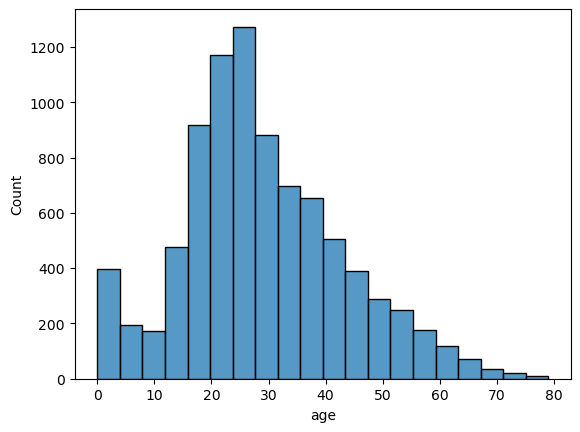

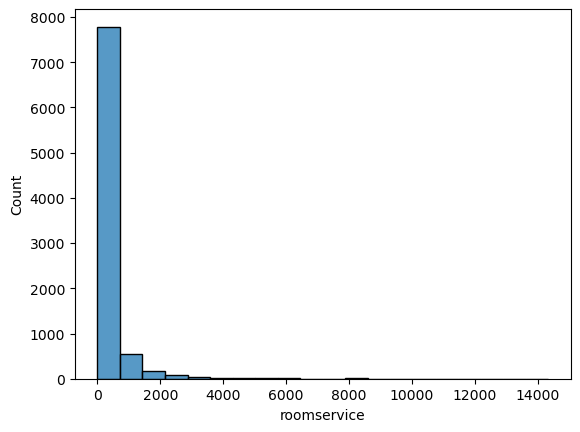

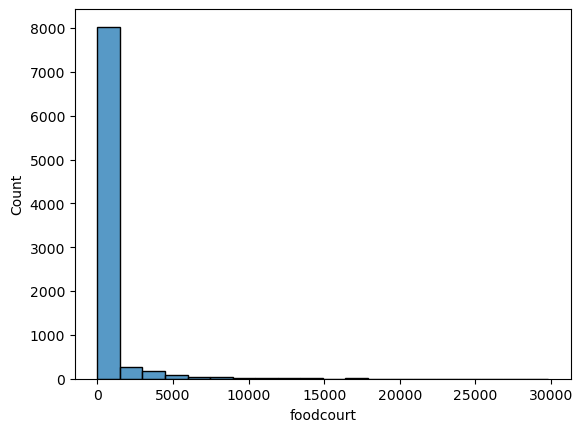

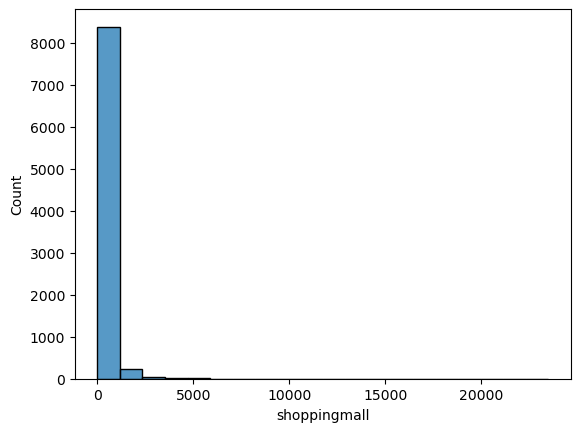

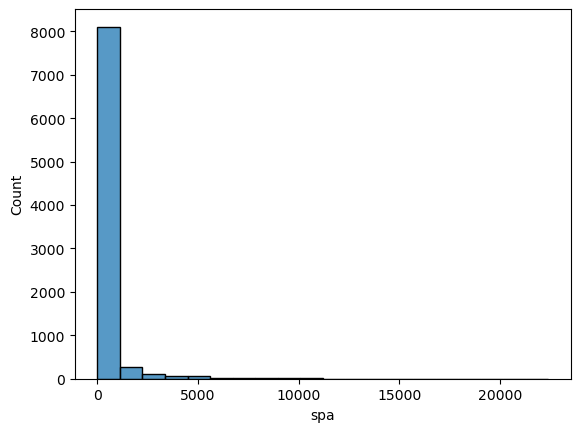

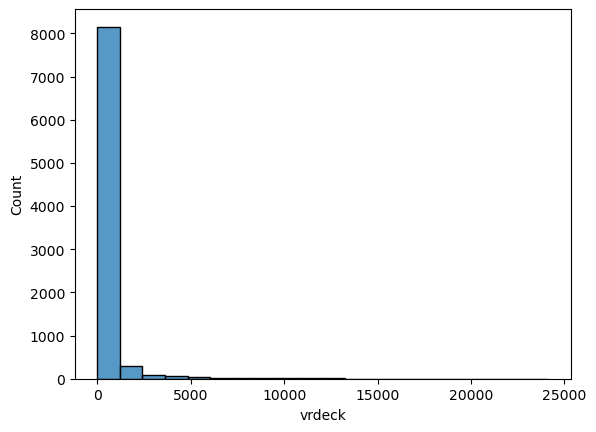

In [116]:
numeric_columns = ['age', 'roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck']

for i in numeric_columns:
    sns.histplot(data=data_train, x=i, bins=20)
    plt.show()

<Axes: >

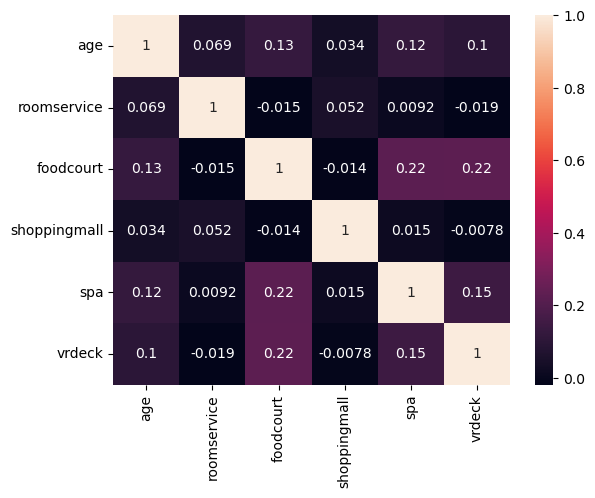

In [124]:
correlation = data_train[numeric_columns].corr()
sns.heatmap(correlation, annot=True)

# HomePlanet

In [58]:
#HomePlanet distribution
planets = data_train['homeplanet']

planets_counts = planets.value_counts()
print(planets_counts)

homeplanet
Earth     4803
Europa    2131
Mars      1759
Name: count, dtype: int64


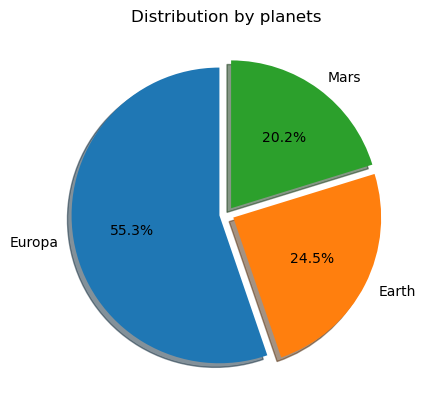

In [59]:
planets_labels = planets.unique()
planets_values = planets_counts.values

fig, ax = plt.subplots()
explode = (0.05, 0.05, 0.05)
ax.pie(planets_values, labels = planets_labels, 
       autopct='%1.1f%%', startangle = 90, explode = explode, shadow = True)
plt.title('Distribution by planets')
plt.show()

homeplanet  transported
Earth       False          2749
            True           2054
Europa      False           727
            True           1404
Mars        False           839
            True            920
dtype: int64


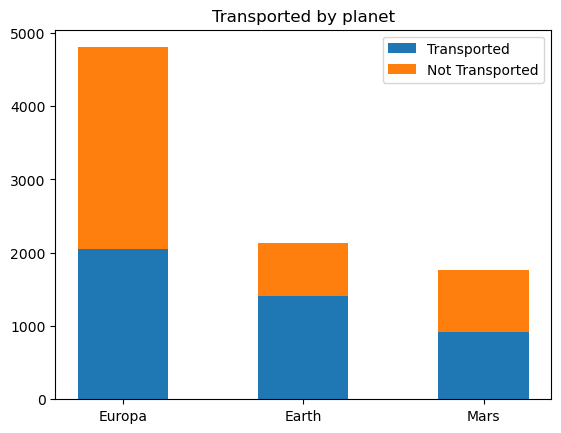

In [60]:
#shows who transported with which plannet
transported = data_train['transported']

planets_transported = data_train.groupby([planets, transported]).size()
transported_true = planets_transported.xs(True, level='transported').values
transported_false = planets_transported.xs(False, level='transported').values
print(planets_transported)

species = ('Europa', 'Earth', 'Mars')
weight_counts = {
    "Transported": transported_true,
    "Not Transported": transported_false,
}

fig, ax = plt.subplots()
bottom = np.zeros(3)
width = 0.5

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

plt.title('Transported by planet')
ax.legend(loc="upper right")
plt.show()

# CryoSleep

In [61]:
cryosleep = data_train['cryosleep']

cryosleep_counts = cryosleep.value_counts()
print(cryosleep_counts)

cryosleep
False    5656
True     3037
Name: count, dtype: int64


cryosleep  transported
False      False          3761
           True           1895
True       False           554
           True           2483
dtype: int64


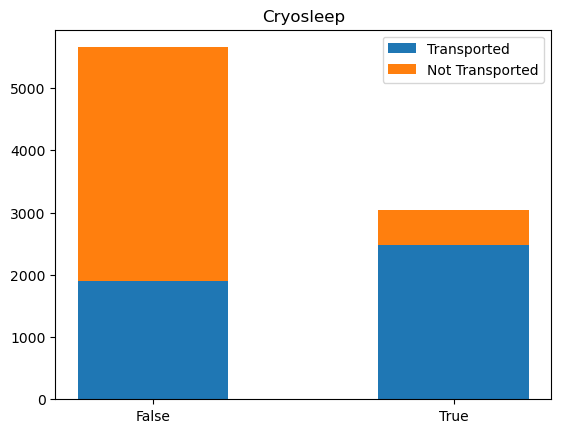

In [63]:
cryosleep_transported = data_train.groupby([cryosleep, transported]).size()
cryosleep_transported_true = cryosleep_transported.xs(True, level='transported').values
cryosleep_transported_false = cryosleep_transported.xs(False, level='transported').values
print(cryosleep_transported)

species = ('False', 'True')
weight_counts = {
    "Transported": cryosleep_transported_true,
    "Not Transported": cryosleep_transported_false,
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.5

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

plt.title('Cryosleep')
ax.legend(loc="upper right")
plt.show()